In [117]:
import pandas as pd
import numpy as np
import os 
import re
import sys
import glob
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('combined_final_elo_rating_df.xlsx')
correlation_xlsx = pd.ExcelWriter('correlation.xlsx')

df = df [[
 'cage_num_of_subject',
 'cohort',
 'home_cage_observation_final_elo_rating',
 'home_cage_observation_rank',
 'reward_competition_final_elo_rating',
 'reward_competition_rank',
 'strain',
 'subject_id',
 'tube_test_final_elo_rating',
 'tube_test_rank',
 'urine_marking_final_elo_rating',
 'urine_marking_rank']]

In [4]:
CD1_df = df[df['strain'] == 'CD1']
CD1_df.columns.to_list()
CD1_df = CD1_df[[
 'home_cage_observation_final_elo_rating',
 'reward_competition_final_elo_rating',
 'tube_test_final_elo_rating',
 'urine_marking_final_elo_rating']]
CD1_corr = CD1_df.corr()
CD1_p_values = CD1_df.apply(lambda x: CD1_df.apply(lambda y: pearsonr(x, y)[1]))
CD1_corr.to_excel(correlation_xlsx, sheet_name='CD1 R Values', index=False)

C:\Users\megha\AppData\Local\Temp\ipykernel_28044\594023949.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  CD1_corr = CD1_df.corr()


In [5]:
C57_df = df[df['strain'] == 'C57']
C57_df.columns.to_list()
C57_df = C57_df[[
 'home_cage_observation_final_elo_rating',
 'reward_competition_final_elo_rating',
 'tube_test_final_elo_rating',
 'urine_marking_final_elo_rating']]
C57_corr = C57_df.corr()
C57_corr.to_excel(correlation_xlsx, sheet_name= 'C57 R vlues', index=False)

C:\Users\megha\AppData\Local\Temp\ipykernel_28044\1567447675.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  C57_corr = C57_df.corr()


In [6]:
C57_no_HCO = C57_df[[
 'reward_competition_final_elo_rating',
 'tube_test_final_elo_rating',
 'urine_marking_final_elo_rating']]
p_values = C57_no_HCO.apply(lambda x: C57_no_HCO.apply(lambda y: pearsonr(x, y)[1]))

In [7]:
C57_df = C57_df.dropna(how = 'any')
C57_df
p_values_HCO = C57_df.apply(lambda x: C57_df.apply(lambda y: pearsonr(x, y)[1]))
p_values_HCO = p_values_HCO[['home_cage_observation_final_elo_rating']]
p_values_HCO
p_values['home_cage_observation_final_elo_rating'] = p_values_HCO['home_cage_observation_final_elo_rating']
p_values.to_excel(correlation_xlsx,sheet_name='C57 P values', index = False)

In [8]:
correlation_xlsx.save()

C:\Users\megha\AppData\Local\Temp\ipykernel_28044\974219345.py:1: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  correlation_xlsx.save()


# stability correlations ELO score diff

In [14]:
stability_df = pd.read_excel('pairwise_and_final_elo_score.xlsx')
stability_df.columns

Index(['Unnamed: 0', 'tuple_animal_id', 'first_spot_number',
       'second_spot_number', 'cohort', 'strain', 'uma_number_difference',
       'uma_percent_difference', 'uma_number_tie', 'uma_percent_tie',
       'uma_number_then_percent_tie', 'uma_averaged_winner',
       'uma_averaged_loser', 'tt_tuple_animal_id', 'tt_winner', 'tt_loser',
       'tt_averaged_winner', 'tt_averaged_loser', 'tt_winner_count',
       'tt_loser_count', 'tt_count_difference', 'tt_match_count',
       'tt_percent_win', 'tt_percentage_tie', 'hco_tuple_animal_id',
       'hco_winner', 'hco_loser', 'hco_action', 'hco_averaged_winner',
       'hco_averaged_loser', 'hco_winner_count', 'hco_loser_count',
       'hco_count_difference', 'hco_match_count', 'hco_percent_win',
       'hco_percentage_tie', 'rc_animal_ids', 'rc_winner', 'rc_loser',
       'rc_average_number_of_switches', 'rc_winner_no_ties',
       'rc_loser_no_ties', 'rc_averaged_winner', 'rc_averaged_loser',
       'rc_winner_count', 'rc_loser_count', 

In [140]:
davidscore_df = pd.read_csv('david_score_master_file.csv')
def create_id(pilot, id):
    return(pilot[-1] +'.' + str(id))
davidscore_df

davidscore_df['subject'] = davidscore_df.apply(lambda x: create_id(x['pilot'], x['ID']), axis = 1)
davidscore_df



,pilot,ID,strain,Home_Cage,Home_Cage_DS,final_elo_rating1,Reward_Comp,Reward_Comp_DS,final_elo_rating2,Tube_Test,Tube_Test_DS,final_elo_rating3,Urine_Marking,Urine_Marking_DS,final_elo_rating4,subject
0,pilot_1,1.1,C57,NaN,NaN,NaN,Reward_Comp,0.799,1088.8,Tube_Test,1.429,1062.2,Urine_Marking,4.0,1010.3,1.1.1
1,pilot_1,1.2,C57,NaN,NaN,NaN,Reward_Comp,0.747,1067.1,Tube_Test,-2.000,927.1,Urine_Marking,2.0,1000.8,1.1.2
2,pilot_1,1.3,C57,NaN,NaN,NaN,Reward_Comp,-0.817,904.3,Tube_Test,-5.429,775.7,Urine_Marking,-6.0,972.0,1.1.3
3,pilot_1,1.4,C57,NaN,NaN,NaN,Reward_Comp,-0.729,939.8,Tube_Test,6.000,1235.0,Urine_Marking,0.0,1016.9,1.1.4
4,pilot_1,2.1,C57,NaN,NaN,NaN,Reward_Comp,1.588,1061.3,Tube_Test,3.000,1122.6,Urine_Marking,6.0,1037.4,1.2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,pilot_3,5.4,CD1,Home_Cage,-1.375,940.6,Reward_Comp,-1.313,963.0,Tube_Test,6.000,1165.3,Urine_Marking,6.0,1019.7,3.5.4
60,pilot_3,6.1,CD1,NaN,NaN,NaN,Reward_Comp,-0.819,974.5,Tube_Test,5.000,1137.7,Urine_Marking,-2.0,980.6,3.6.1
61,pilot_3,6.2,CD1,NaN,NaN,NaN,Reward_Comp,-3.988,751.8,Tube_Test,0.500,1021.2,Urine_Marking,-6.0,980.6,3.6.2
62,pilot_3,6.3,CD1,NaN,NaN,NaN,Reward_Comp,3.620,1244.4,Tube_Test,0.500,1006.6,Urine_Marking,6.0,1028.8,3.6.3


In [143]:
concise_df = stability_df[['Unnamed: 0', 'cohort', 'tuple_animal_id', 'strain',
       'uma_number_then_percent_tie','tt_percentage_tie',
       'hco_percentage_tie', 'rc_is_win_to_win_and_loss_ratio_tie','first_subject_id',
       'first_home_cage_observation_final_elo_score',
       'first_reward_competition_final_elo_score', 'first_tube_test_final_elo_score',
       'first_tube_test_rank', 'first_urine_marking_final_elo_score', 'second_subject_id',
       'second_home_cage_observation_final_elo_score',
       'second_reward_competition_final_elo_score',
       'second_tube_test_final_elo_score',
       'second_urine_marking_final_elo_score']]
concise_df
concise_df['first_subject_id'] = concise_df.apply(lambda x: create_id(x['cohort'], x['first_subject_id']), axis = 1)
concise_df['second_subject_id'] = concise_df.apply(lambda x: create_id(x['cohort'], x['second_subject_id']), axis = 1)
concise_df


C:\Users\megha\AppData\Local\Temp\ipykernel_28044\3369324151.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  concise_df['first_subject_id'] = concise_df.apply(lambda x: create_id(x['cohort'], x['first_subject_id']), axis = 1)
C:\Users\megha\AppData\Local\Temp\ipykernel_28044\3369324151.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  concise_df['second_subject_id'] = concise_df.apply(lambda x: create_id(x['cohort'], x['second_subject_id']), axis = 1)


,Unnamed: 0,cohort,tuple_animal_id,strain,uma_number_then_percent_tie,tt_percentage_tie,hco_percentage_tie,rc_is_win_to_win_and_loss_ratio_tie,first_subject_id,first_home_cage_observation_final_elo_score,first_reward_competition_final_elo_score,first_tube_test_final_elo_score,first_tube_test_rank,first_urine_marking_final_elo_score,second_subject_id,second_home_cage_observation_final_elo_score,second_reward_competition_final_elo_score,second_tube_test_final_elo_score,second_urine_marking_final_elo_score
0,0,pilot_1,"('1.1', '1.2')",C57,False,False,NaN,True,1.1.1,NaN,1165.8,1062.2,2,1010.3,1.1.2,NaN,1007.3,927.1,1000.8
1,1,pilot_1,"('1.1', '1.3')",C57,False,False,NaN,True,1.1.1,NaN,1165.8,1062.2,2,1010.3,1.1.3,NaN,900.9,775.7,972.0
2,2,pilot_1,"('1.1', '1.4')",C57,True,False,NaN,False,1.1.1,NaN,1165.8,1062.2,2,1010.3,1.1.4,NaN,926.0,1235.0,1016.9
3,3,pilot_1,"('1.2', '1.3')",C57,True,False,NaN,False,1.1.2,NaN,1007.3,927.1,3,1000.8,1.1.3,NaN,900.9,775.7,972.0
4,4,pilot_1,"('1.2', '1.4')",C57,True,False,NaN,True,1.1.2,NaN,1007.3,927.1,3,1000.8,1.1.4,NaN,926.0,1235.0,1016.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,91,pilot_2,"('6.1', '6.3')",CD1,False,True,0.0,False,2.6.1,1425.3,1117.1,943.6,3,1027.0,2.6.3,714.6,1023.3,910.6,1009.7
92,92,pilot_2,"('6.1', '6.4')",CD1,False,True,0.0,False,2.6.1,1425.3,1117.1,943.6,3,1027.0,2.6.4,1080.4,911.2,1114.1,1000.8
93,93,pilot_2,"('6.2', '6.3')",CD1,False,False,0.0,True,2.6.2,779.7,948.4,1031.7,2,962.5,2.6.3,714.6,1023.3,910.6,1009.7
94,94,pilot_2,"('6.2', '6.4')",CD1,False,True,0.0,False,2.6.2,779.7,948.4,1031.7,2,962.5,2.6.4,1080.4,911.2,1114.1,1000.8


C:\Users\megha\AppData\Local\Temp\ipykernel_28044\491507542.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  um_tt['dom_anchor'] = doms
C:\Users\megha\AppData\Local\Temp\ipykernel_28044\491507542.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  um_tt['sub_anchor'] = subs
C:\Users\megha\AppData\Local\Temp\ipykernel_28044\491507542.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

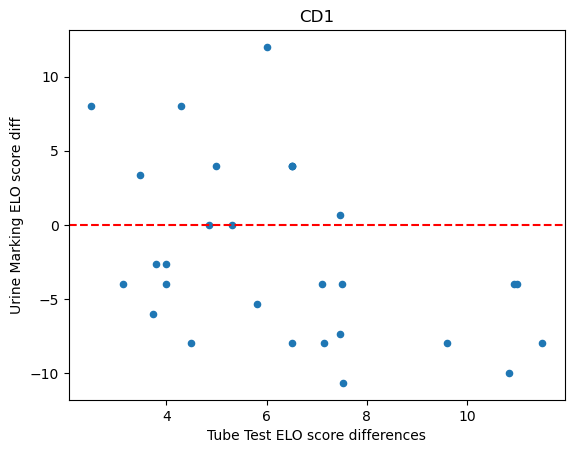

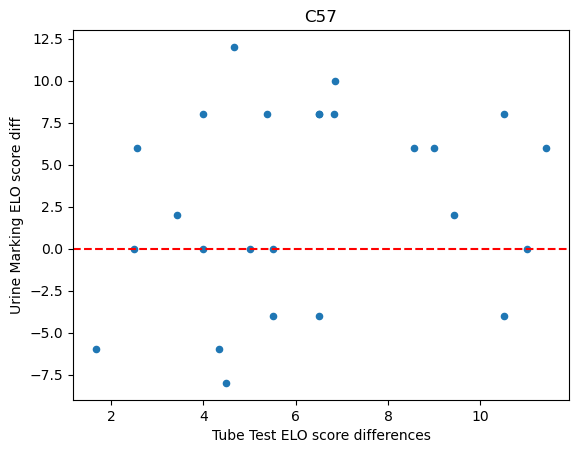

In [151]:
um_tt = concise_df[concise_df.apply(lambda row: (row['uma_number_then_percent_tie'] == 0) & (row['tt_percentage_tie'] == 0), axis = 1)]

def who_is_dom(elo_one, elo_two, first, second):
    if elo_one > elo_two: 
        return(first)
    else:
        return(second)
    
def who_is_sub(elo_one, elo_two, first, second):
    if elo_one < elo_two: 
        return(first)
    else:
        return(second)

def calc_diff(dom, elo_one, elo_two):
    if dom == 'first_':
        return(elo_one - elo_two)
    else:
        return(elo_two - elo_one)

doms = um_tt.apply(lambda x: who_is_dom(x['first_tube_test_final_elo_score'], x['second_tube_test_final_elo_score'], x['first_subject_id'], x['second_subject_id']), axis = 1)
subs = um_tt.apply(lambda x: who_is_sub(x['first_tube_test_final_elo_score'], x['second_tube_test_final_elo_score'], x['first_subject_id'], x['second_subject_id']), axis = 1)
um_tt['dom_anchor'] = doms

um_tt['sub_anchor'] = subs
tt_mapping = davidscore_df.set_index('subject')['Tube_Test_DS'].to_dict()
um_tt['anchor_diff'] = um_tt['dom_anchor'].map(tt_mapping) - um_tt['sub_anchor'].map(tt_mapping)
um_mapping = davidscore_df.set_index('subject')['Urine_Marking_DS'].to_dict()
um_tt['comp_diff'] = um_tt['dom_anchor'].map(um_mapping) - um_tt['sub_anchor'].map(um_mapping)
um_tt
#um_tt['anchor_diff'] = um_tt.apply(lambda x: calc_diff(x['dom_anchor'], x['first_tube_test_final_elo_score'],x['second_tube_test_final_elo_score'] ), axis = 1)
#um_tt['comp_diff'] = um_tt.apply(lambda x: calc_diff(x['dom_anchor'], x['first_urine_marking_final_elo_score'],x['second_urine_marking_final_elo_score'] ), axis = 1)


um_tt_cd1 = um_tt[um_tt['strain'] == 'CD1']
um_tt_c57 = um_tt[um_tt['strain'] == 'C57']
um_tt_cd1.plot.scatter(x = 'anchor_diff', y = 'comp_diff')
plt.xlabel('Tube Test DS score differences')
plt.ylabel('Urine Marking DS score diff')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('CD1')
plt.show()

um_tt_c57.plot.scatter(x = 'anchor_diff', y = 'comp_diff')
plt.xlabel('Tube Test ELO score differences')
plt.ylabel('Urine Marking ELO score diff')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('C57')
plt.show()



C:\Users\megha\AppData\Local\Temp\ipykernel_28044\1606449532.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  concise_df.loc[:,'hco_tt'] = mask
C:\Users\megha\AppData\Local\Temp\ipykernel_28044\1606449532.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hco_tt['dom_anchor'] = elo_scores
C:\Users\megha\AppData\Local\Temp\ipykernel_28044\1606449532.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

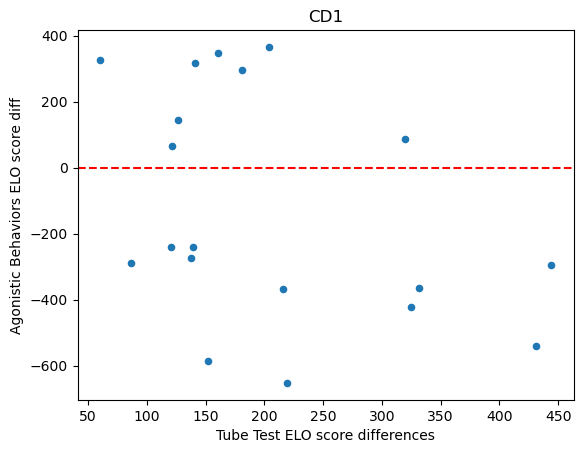

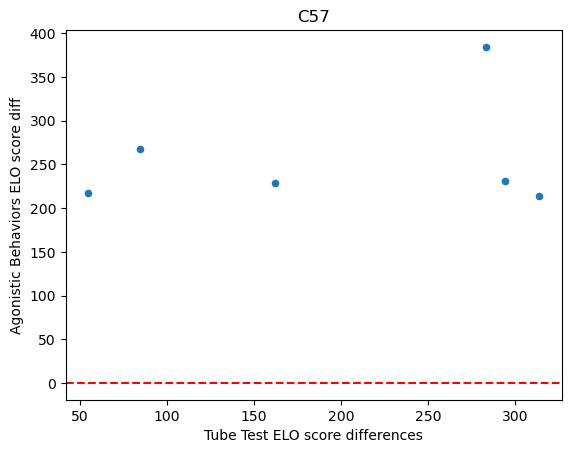

In [127]:
mask = concise_df.apply(lambda row: (row['hco_percentage_tie'] == 0) & (row['tt_percentage_tie'] == 0), axis=1)
concise_df.loc[:,'hco_tt'] = mask
concise_df

hco_tt = concise_df[concise_df.apply(lambda row: (row['hco_percentage_tie'] == 0) & (row['tt_percentage_tie'] == 0), axis = 1)]
elo_scores = hco_tt.apply(lambda x: who_is_dom(x['first_tube_test_final_elo_score'], x['second_tube_test_final_elo_score']), axis = 1)
hco_tt['dom_anchor'] = elo_scores
hco_tt['anchor_diff'] = hco_tt.apply(lambda x: calc_diff(x['dom_anchor'], x['first_tube_test_final_elo_score'],x['second_tube_test_final_elo_score'] ), axis = 1)
hco_tt['comp_diff'] = hco_tt.apply(lambda x: calc_diff(x['dom_anchor'], x['first_home_cage_observation_final_elo_score'],x['second_home_cage_observation_final_elo_score'] ), axis = 1)


hco_tt_cd1 = hco_tt[hco_tt['strain'] == 'CD1']
hco_tt_c57 = hco_tt[hco_tt['strain'] == 'C57']
hco_tt_cd1.plot.scatter(x = 'anchor_diff', y = 'comp_diff')
plt.xlabel('Tube Test ELO score differences')
plt.ylabel('Agonistic Behaviors ELO score diff')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('CD1')
plt.show()

hco_tt_c57.plot.scatter(x = 'anchor_diff', y = 'comp_diff')
plt.xlabel('Tube Test ELO score differences')
plt.ylabel('Agonistic Behaviors ELO score diff')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('C57')
plt.show()


In [90]:
mask = concise_df.apply(lambda row: (row['rc_is_win_to_win_and_loss_ratio_tie'] == 0) & (row['tt_percentage_tie'] == 0), axis=1)

# Assign the boolean mask to the new column using .loc[]
concise_df.loc[:, 'rc_tt'] = mask


C:\Users\megha\AppData\Local\Temp\ipykernel_28044\2496797764.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  concise_df.loc[:, 'rc_tt'] = mask


In [91]:
mask = concise_df.apply(lambda row: (row['rc_is_win_to_win_and_loss_ratio_tie'] == 0) & (row['hco_percentage_tie'] == 0), axis=1)

# Assign the boolean mask to the new column using .loc[]
concise_df.loc[:, 'rc_hco'] = mask


C:\Users\megha\AppData\Local\Temp\ipykernel_28044\1017188220.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  concise_df.loc[:, 'rc_hco'] = mask


In [92]:
mask = concise_df.apply(lambda row: (row['uma_number_then_percent_tie'] == 0) & (row['hco_percentage_tie'] == 0), axis=1)

# Assign the boolean mask to the new column using .loc[]
concise_df.loc[:, 'um_hco'] = mask

C:\Users\megha\AppData\Local\Temp\ipykernel_28044\762374207.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  concise_df.loc[:, 'um_hco'] = mask


In [93]:
mask = concise_df.apply(lambda row: (row['uma_number_then_percent_tie'] == 0) & (row['rc_is_win_to_win_and_loss_ratio_tie'] == 0), axis=1)

# Assign the boolean mask to the new column using .loc[]
concise_df.loc[:, 'um_vs_rc'] = mask



C:\Users\megha\AppData\Local\Temp\ipykernel_28044\1451216474.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  concise_df.loc[:, 'um_vs_rc'] = mask


In [94]:
concise_df

,Unnamed: 0,cohort,tuple_animal_id,strain,uma_number_then_percent_tie,tt_percentage_tie,hco_percentage_tie,rc_is_win_to_win_and_loss_ratio_tie,first_subject_id,first_home_cage_observation_final_elo_score,...,second_home_cage_observation_final_elo_score,second_reward_competition_final_elo_score,second_tube_test_final_elo_score,second_urine_marking_final_elo_score,um_tt,hco_tt,rc_tt,rc_hco,um_hco,um_vs_rc
0,0,pilot_1,"('1.1', '1.2')",C57,False,False,NaN,True,1.1,NaN,...,NaN,1007.3,927.1,1000.8,True,False,False,False,False,False
1,1,pilot_1,"('1.1', '1.3')",C57,False,False,NaN,True,1.1,NaN,...,NaN,900.9,775.7,972.0,True,False,False,False,False,False
2,2,pilot_1,"('1.1', '1.4')",C57,True,False,NaN,False,1.1,NaN,...,NaN,926.0,1235.0,1016.9,False,False,True,False,False,False
3,3,pilot_1,"('1.2', '1.3')",C57,True,False,NaN,False,1.2,NaN,...,NaN,900.9,775.7,972.0,False,False,True,False,False,False
4,4,pilot_1,"('1.2', '1.4')",C57,True,False,NaN,True,1.2,NaN,...,NaN,926.0,1235.0,1016.9,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,91,pilot_2,"('6.1', '6.3')",CD1,False,True,0.0,False,6.1,1425.3,...,714.6,1023.3,910.6,1009.7,False,False,False,True,True,True
92,92,pilot_2,"('6.1', '6.4')",CD1,False,True,0.0,False,6.1,1425.3,...,1080.4,911.2,1114.1,1000.8,False,False,False,True,True,True
93,93,pilot_2,"('6.2', '6.3')",CD1,False,False,0.0,True,6.2,779.7,...,714.6,1023.3,910.6,1009.7,True,True,False,False,True,False
94,94,pilot_2,"('6.2', '6.4')",CD1,False,True,0.0,False,6.2,779.7,...,1080.4,911.2,1114.1,1000.8,False,False,False,True,True,True


In [100]:
# true = stable

    
# def do_calculation(stability_column, anchor_assay, comparative_assay):
#     elo_one = 'first_' + anchor_assay + '_final_elo_score'
#     elo_two = 'second_' + anchor_assay + '_final_elo_score'
#     if stability_column:
#         dom_id = who_is_dom(elo_one, elo_two)
#     else:
#         return(False)
        

# def calc_stable_diff(stability_column, anchor_assay, comparative_assay, new_column_name):
   
    


0     not stable
1     not stable
2     not stable
3     not stable
4     not stable
         ...    
91    not stable
92    not stable
93        first_
94    not stable
95       second_
Length: 96, dtype: object